<a href="https://colab.research.google.com/github/MichaelVanHouHei/-/blob/main/DB92728VANHOUHEI_ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn-evaluation # easier for confusion matrixx and roc aoc graph plot
from google.colab import files
#files.download("/content/file.zip")
from sklearn_evaluation import ClassifierEvaluator


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.0 MB/s 
     |████████████████████████████████| 1.5 MB 10.7 MB/s 
     |████████████████████████████████| 96 kB 6.1 MB/s 
     |████████████████████████████████| 1.6 MB 44.8 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
!zip -r /content/file.zip /content/PreTrafficSignData

串流輸出內容已截斷至最後 5000 行。
  adding: content/PreTrafficSignData/7/675.dat (deflated 22%)
  adding: content/PreTrafficSignData/7/567.dat (deflated 22%)
  adding: content/PreTrafficSignData/7/604.dat (deflated 23%)
  adding: content/PreTrafficSignData/7/59.dat (deflated 23%)
  adding: content/PreTrafficSignData/7/1783.dat (deflated 23%)
  adding: content/PreTrafficSignData/7/646.dat (deflated 22%)
  adding: content/PreTrafficSignData/7/2.dat (deflated 31%)
  adding: content/PreTrafficSignData/7/1355.dat (deflated 24%)
  adding: content/PreTrafficSignData/7/1957.dat (deflated 23%)
  adding: content/PreTrafficSignData/7/1531.dat (deflated 26%)
  adding: content/PreTrafficSignData/7/1847.dat (deflated 22%)
  adding: content/PreTrafficSignData/7/1763.dat (deflated 22%)
  adding: content/PreTrafficSignData/7/1235.dat (deflated 23%)
  adding: content/PreTrafficSignData/7/365.dat (deflated 27%)
  adding: content/PreTrafficSignData/7/205.dat (deflated 24%)
  adding: content/PreTrafficSignData/7/1155.d

In [ ]:
#this part is sync from google drive to get our dataset
%matplotlib inline 
from google.colab import drive
#plz notice that if you wanted to train the dataset , extract it
#or if you are the first run , than probably colab didn't train it yet
#maybe i provide the saving model next time 
#uncomment the below code if you are the first run
##if(not os.path.exists(path)):
drive.mount('/gdrive/')
!unzip '/gdrive/My Drive/Colab Notebooks/TrafficSignData.zip'

串流輸出內容已截斷至最後 5000 行。
  inflating: TrafficSignData/Training/00010/00021_00019.ppm  
  inflating: TrafficSignData/Training/00010/00021_00020.ppm  
  inflating: TrafficSignData/Training/00010/00021_00021.ppm  
  inflating: TrafficSignData/Training/00010/00021_00022.ppm  
  inflating: TrafficSignData/Training/00010/00021_00023.ppm  
  inflating: TrafficSignData/Training/00010/00021_00024.ppm  
  inflating: TrafficSignData/Training/00010/00021_00025.ppm  
  inflating: TrafficSignData/Training/00010/00021_00026.ppm  
  inflating: TrafficSignData/Training/00010/00021_00027.ppm  
  inflating: TrafficSignData/Training/00010/00021_00028.ppm  
  inflating: TrafficSignData/Training/00010/00021_00029.ppm  
  inflating: TrafficSignData/Training/00010/00022_00000.ppm  
  inflating: TrafficSignData/Training/00010/00022_00001.ppm  
  inflating: TrafficSignData/Training/00010/00022_00002.ppm  
  inflating: TrafficSignData/Training/00010/00022_00003.ppm  
  inflating: TrafficSignData/Training/00010/00022

In [ ]:
import threading   #thread process 
import numpy as np# linear alg 
import itertools 
from PIL import Image  #image process 
import matplotlib.pyplot as plt #plot 
import pandas as pd# read csv and convert to dataframe 
#some methodology and model , score 
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
#some sklearn build in image processing
from skimage import transform
from skimage import exposure
from skimage import io
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
import cv2  #open cv for image processing 
import os
from os import listdir
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from os.path import isfile, join
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
import xgboost as xgb #xgboost 
from joblib import Parallel, delayed# parallel processing for faster train , process dataset 
import joblib
from joblib import dump, load # save and laod model 
from operator import neg
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier  #xgboost package 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

ROOT = './TrafficSignData/Training'   # Root for our dataset 
PRE_SET = './PreTrafficSignData/'  #cache for our pre-process image , they are array , so i named them as dat since they are btyes buffer 
AUG_SET = './AugTrafficSignData/'  # augmenation set ( dep)
TA_SET = './testData/'   # for tester program playground 
NUM_CLASSES=15   #total classes in this dataset 
FIRST_RUN = not os.path.exists(PRE_SET)   # determine is that first run , if not read cache 
TOTAL_IMAGES=15540  #total images in this dataset
MAXIUMN_CLASS = 2010 # denote by eda , we know the maxiumn count(2010) of data is class 2,
#FIRST_RUN=True
print("check if you are first run:",FIRST_RUN)


check if you are first run: True


In [ ]:
#here just loading dataset and build cache folder 
def getProcessedDataSet():
  images = [] 
  labels = [] 
  #originally it is a constant , by i always made some human error since it is notebook 
  #so better double check because of my problem
  FIRST_RUN = not os.path.exists(PRE_SET)
  for i in range(0,NUM_CLASSES):
    current_pre_folder = os.path.join(PRE_SET,str(i))
    count = 0
    imgs = []
    if FIRST_RUN:

      if not os.path.exists(PRE_SET):
        os.mkdir(PRE_SET)
      
      if not os.path.exists(current_pre_folder):
        os.mkdir(current_pre_folder)
      print("well , first time running , so we have to preprocess")
      
      prefix = ROOT + '/' + format(i, '05d') + '/'
      label_csv = pd.read_csv(prefix + 'GT-'+ format(i, '05d') + '.csv',sep=';')
      print('processing:',prefix)
      
      for index,row in label_csv.iterrows():
        img=io.imread(prefix + row['Filename'])
        #cropping image base on its ROI 
        img = img[row['Roi.Y1']:row['Roi.Y2'], row['Roi.X1']:row['Roi.X2']]
       # img=preProcessImage(img)
        imgs.append(img)
        labels.append(int(label_csv.iloc[0]['ClassId']))
       # print("saving:",current_pre_folder+"/"+row['Filename'])
        #cv2.imwrite(current_pre_folder+"/"+row['Filename'].replace('.ppm','.jpg'), img)
        #here shold be saving ndarray instead of just image , since it flatten 
        #but anyway ,lets correct it when i have time
        #img.tofile(current_pre_folder+"/"+row['Filename'].replace('.ppm','.dat')) # well i have to to correct it now 
      #just for sure if it is same as our graph
        count=count +1
      #print('total images:',count)
    else:
      #directly read cache if not fast run 
      imagesPaths = [f for f in listdir(current_pre_folder) if isfile(join(current_pre_folder, f))]
      
      print('reading preprocess data:',i)
      for path in imagesPaths:
        img =np.fromfile(current_pre_folder+"/"+path, dtype="float32")
        #img=io.imread()
        imgs.append(img)
        labels.append(int(i))
        count=count+1
    print('total images for this class(before data augmentation):',count)
    images.append(imgs)
  print("all images",len(images),"label counts",len(labels))
  return images  , labels
  #how we do image pre-processing 
  #mainly is resize , histrogram ,,
def preProcessImage(img):
   #img = img.crop((row['Roi.X1'], row['Roi.Y1'], row['Roi.X2'], row['Roi.Y2']))
   
      #standardize for all size
   img = transform.resize(img, (32, 32)) #lets resize first ,if not too slow 
   img =exposure.equalize_adapthist(img, clip_limit=0.1)
      #roll color  axis to axis 0
   img = np.rollaxis(img,-1)
    #normalize it before return
   
   img = img.flatten()
   img = img.astype('float32')
   return img 
   #just splitting the dataset 
def getSplittedDataSet(images , labels):
   print("------split function inputs---------")
   print("------total images:" , len(images))
   print("------total label:",len(labels))
   X=[]
   Y=[]
  
   for i in range(0,len(labels)):  
        # input X just the flattern image, you can design other features to represent a image
     X.append(images[i])
     Y.append(labels[i])
   X=np.array(X)
   Y=np.array(Y)
  
   #print(X)
   #print(Y)
   X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, shuffle = True)
   #check before train , since colab once disconnected become emtry dataset
   print("--------------After split-------------")
   print("--------------X  Train Test Split----Y Train Test Split------")

   print(len(X_train),' ',len(X_test),' ',len(Y_train),' ',len(Y_test))
   return (X_train, X_test, Y_train, Y_test)
   #for parallel training , saving , testing the model 
def getTrainAndTestModel(clf, model_name, X_train, X_test, Y_train, Y_test):
   with joblib.parallel_backend("multiprocessing"):
    print("Begin Training:" + model_name)
   
   
    clf.fit(X_train,Y_train)
   # predict the training data
    Ypred = clf.predict(X_test)
    dump(clf, "./" +model_name+ ".joblib") 
    print("-----Training report----------")
    print(classification_report(Y_test, Ypred, digits=3))
    print(f"Accuracy of {model_name} = {accuracy_score(Y_test, Ypred):0.3f}")
   return clf
   #build in a models dict for parallel process 
def createModels():
  
    clf1 =OneVsRestClassifier(estimator=Perceptron(),n_jobs=-1)
   # clf2 = OneVsOneClassifier(estimator=svm.SVC(),n_jobs=-1)
    clf2=RandomForestClassifier()
    clf3 =  OneVsRestClassifier(xgb.XGBClassifier())
   # clf4 = OneVsOneClassifier(estimator=GaussianProcessClassifier(),n_jobs=-1)
   # clf5 = OneVsRestClassifier(estimator=GradientBoostingClassifier(),n_jobs=-1)
    return [('Perceptron',clf1), ('RandomForest',clf2), ('xgboost',clf3)] 
def getTurnedParameters(X,Y,param_grid):
   #this function will be future work to improve , since there is another block 
   clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy')
   clf.fit(X,Y)
   print("Best parameters set found on development set:")
   print(clf.best_params_)
#just a class information dict , class number with its count
def getClassesDict(y):
  
    unique, counts = np.unique(y, return_counts=True)
    classes_dict = dict(zip(unique, counts))
    print(classes_dict)
    return classes_dict
# since we have to make all class into same count ( i chosed reach to maxiumn class 2 (2010))
#so building a dict for next things we do data augmentation
def getdataAugDict(classes_dict):
     augmentation_dict = {}
     for k in classes_dict.keys():
      curr = classes_dict[k]
      multiplier = np.floor((MAXIUMN_CLASS - curr) / curr)
      augmentation_dict[k] = multiplier
     print(augmentation_dict)
     return augmentation_dict
#here we constuct a data augmentation pipeline which profressor has mentioned 
def augmentMethods(img, rotationRange = 15, shearRange = 2, translationRange = 10):
     # Rotation matrix constuction
    #print("Rotating")
    rotationAngle = np.random.uniform(rotationRange) - rotationRange / 2
    ROW, COL, _ = img.shape    
    rotation_matrix = cv2.getRotationMatrix2D((COL / 2, ROW / 2), rotationAngle, 1)
    img = cv2.warpAffine(img, rotation_matrix, (COL, ROW))
    #print("Shear")
    # Shear  matrix constuction
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shearRange*np.random.uniform()-shearRange/2
    pt2 = 20+shearRange*np.random.uniform()-shearRange/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_matrix = cv2.getAffineTransform(pts1, pts2)
    img = cv2.warpAffine(img, shear_matrix, (COL, ROW))
    #print("Translation")
    # Translation  matrix constuction
    trans_hor = translationRange * np.random.uniform() - translationRange / 2
    trans_vert = translationRange * np.random.uniform() - translationRange / 2
    translation_matrix = np.float32([[1, 0, trans_hor], [0, 1, trans_vert]])
    img = cv2.warpAffine(img, translation_matrix, (COL, ROW))
    return img 
    #batch process for image augmentation   
def batchAugmentation(images,classesDict):
    all_images = [] 
    labels = []
    #check if we are already in cache 
    if sum(classesDict.values()) > TOTAL_IMAGES:
       for c in range(0,len(images)):
          currentClassImages = images[c]
          for img in currentClassImages:
              all_images.append(img)
              labels.append(c)
       print("already augmentation" , len(all_images)," " , len(labels))
       return all_images , labels
    Status = classesDict.copy()
# if not than we do the augmentation 
    for c in range(0,len(images)):     
        current_pre_folder = os.path.join(PRE_SET,str(c))
        currentClassImages = images[c]
        count = 0
        cycle = 0
        print("before augmentation current class:" , c, "total:" , len(currentClassImages))
        for img in currentClassImages:
          img=preProcessImage(img)
          all_images.append(img)
          labels.append(c)
          img.tofile(current_pre_folder+"/"+str(count) + ".dat")
          count+=1
          #while it is not the maxiumn , than repeat augmentation 
        while Status[c] < MAXIUMN_CLASS:
         cycle+=1
         print("cycling augmentation class:" , c , "cycle:" , cycle, "remain:" , MAXIUMN_CLASS -Status[c])
         for img in currentClassImages:
            if Status[c] < MAXIUMN_CLASS:
              aimg = augmentMethods(img)
              aimg=preProcessImage(img)
              aimg.tofile(current_pre_folder+"/"+str(count) + ".dat")
              all_images.append(aimg)
              labels.append(c)
              Status[c] += 1
              count+=1
            else:
                print("after augmentation current class:" , c, "total:" , count)
                break
         
     # here we should think about should i save before preprocessing 
        
    return all_images , labels
    #laod all trained model in the model dict 
def loadAllTrainedModels():
   print("loading all trained models")
   return [(f.replace(".joblib","") ,load(f) ) for f in listdir("./") if isfile(join("./", f))]
   #plot out the confusion matrix 
def getConfusionMatrix(clf,name,x_test,y_test):
   print(name)
   y_pred =clf.predict(x_test)
   cm = confusion_matrix(y_test,y_pred)
   color = 'white'
   matrix = plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)
   matrix.ax_.set_title('Confusion Matrix of ' + name, color=color)
   plt.xlabel('Predicted Label', color=color)
   plt.ylabel('True Label', color=color)
   plt.gcf().axes[0].tick_params(colors=color)
   plt.gcf().axes[1].tick_params(colors=color)
   plt.show()
   #plot out dataset distribution 
def plotDistribution(classDict,isDataAug): 
  titlex ="after" if isDataAug else "before "
  fig, ax = plt.subplots(figsize=(12,6))
  plt.title(f"Distribution of the dataset ({titlex}) Data Augmentation")
  plt.xlabel("Class number")
  plt.ylabel("Number of images")
  ax.bar(range(len(classDict)), classDict.values(), align='center')
  plt.xticks(range(len(classDict)), classDict.keys())
  plt.show()
  #this function is used to input test.csv , test ppm , report have mentioned how it should be inputted 
def getTASet():
    df = pd.read_csv(TA_SET+'test.csv',sep=';')
    inputs = [] 
    answers = []
    for index,row in df.iterrows():
        img=io.imread(TA_SET + row['Filename'])
        img = img[row['Roi.Y1']:row['Roi.Y2'], row['Roi.X1']:row['Roi.X2']]
        img = preProcessImage(img)
        inputs.append(img)
        answers.append(int(row['ClassId']))
    print(f"total input from TA : {len(img)}  , {len(answers)}")
    return inputs,answers
def getPrecisionRecallGraph(clf,name, x_test ,y_test):
    print(name)
    y_pred = clf.predict(x_test)
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.show()
def getROC_AUC_Graph(clf,name,x_test,y_test):
    print(name)
    y_pred = clf.predict(x_test)
    y_score =  clf.predict_proba(x_test)  if hasattr(clf, 'predict_proba')  else clf.decision_function(x_test)
    feature_list = range(NUM_CLASSES)
    target_names = [str(i)  for i in range(NUM_CLASSES)]
    print(target_names)
   
    ce = ClassifierEvaluator(clf, y_test, y_pred, y_score,
                     feature_list, target_names ,estimator_name=name)
   # ce.confusion_matrix()
    print(f"{name} Confusion Matrix")
    ce.confusion_matrix()
    #print(f"{name} precision_at_proportions")
   # ce.precision_at_proportions()
    print(f"{name} precision recall ")
    ce.precision_recall()
    print(f"{name} roc ")
    ce.roc()


    
    
     
    
      
  

In [ ]:
models = createModels()




In [ ]:
models[2][1].predict_proba(X_test)

OneVsRestClassifier(estimator=Perceptron(), n_jobs=-1)

In [ ]:
images , labels = getProcessedDataSet()


well , first time running , so we have to preprocess
processing: ./TrafficSignData/Training/00000/
total images for this class(before data augmentation): 150
well , first time running , so we have to preprocess
processing: ./TrafficSignData/Training/00001/
total images for this class(before data augmentation): 1500
well , first time running , so we have to preprocess
processing: ./TrafficSignData/Training/00002/
total images for this class(before data augmentation): 1500
well , first time running , so we have to preprocess
processing: ./TrafficSignData/Training/00003/
total images for this class(before data augmentation): 960
well , first time running , so we have to preprocess
processing: ./TrafficSignData/Training/00004/
total images for this class(before data augmentation): 1320
well , first time running , so we have to preprocess
processing: ./TrafficSignData/Training/00005/
total images for this class(before data augmentation): 1260
well , first time running , so we have to prepro

{0: 150, 1: 1500, 2: 1500, 3: 960, 4: 1320, 5: 1260, 6: 300, 7: 960, 8: 960, 9: 990, 10: 1350, 11: 900, 12: 1410, 13: 1440, 14: 540}


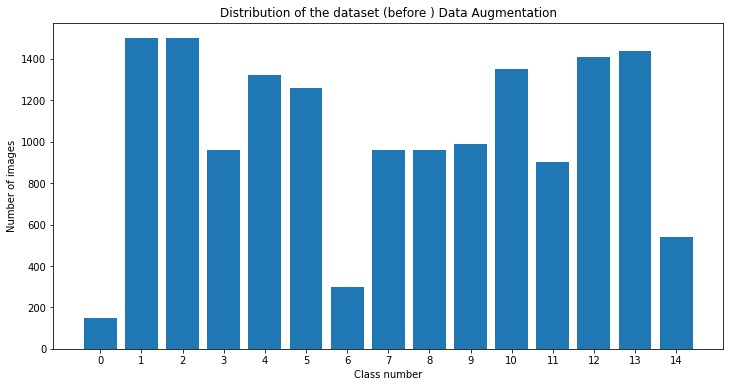

{0: 12.0, 1: 0.0, 2: 0.0, 3: 1.0, 4: 0.0, 5: 0.0, 6: 5.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 0.0, 11: 1.0, 12: 0.0, 13: 0.0, 14: 2.0}
before augmentation current class: 0 total: 150
cycling augmentation class: 0 cycle: 1 remain: 1860
cycling augmentation class: 0 cycle: 2 remain: 1710
cycling augmentation class: 0 cycle: 3 remain: 1560
cycling augmentation class: 0 cycle: 4 remain: 1410
cycling augmentation class: 0 cycle: 5 remain: 1260
cycling augmentation class: 0 cycle: 6 remain: 1110
cycling augmentation class: 0 cycle: 7 remain: 960
cycling augmentation class: 0 cycle: 8 remain: 810
cycling augmentation class: 0 cycle: 9 remain: 660
cycling augmentation class: 0 cycle: 10 remain: 510
cycling augmentation class: 0 cycle: 11 remain: 360
cycling augmentation class: 0 cycle: 12 remain: 210
cycling augmentation class: 0 cycle: 13 remain: 60
after augmentation current class: 0 total: 2010
before augmentation current class: 1 total: 1500
cycling augmentation class: 1 cycle: 1 remain: 510
after

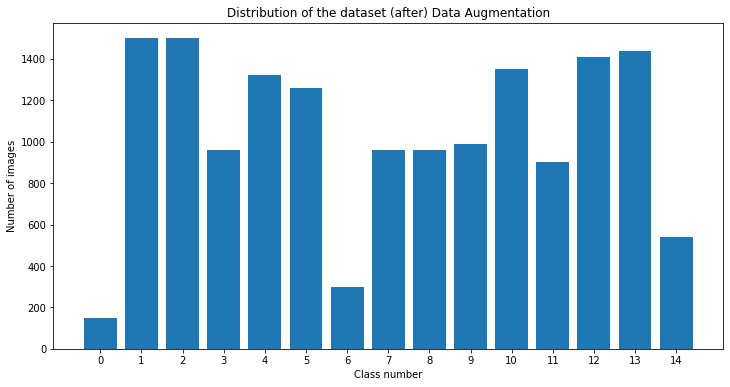

In [ ]:
classesDict = getClassesDict(labels)
plotDistribution(classesDict,False)
augmentationDict =getdataAugDict(classesDict)
images , labels = batchAugmentation(images ,classesDict )
plotDistribution(classesDict,True)
 
  

In [ ]:
X_train, X_test, Y_train, Y_test=getSplittedDataSet(images,labels)

------split function inputs---------
------total images: 30150
------total label: 30150
--------------After split-------------
--------------X  Train Test Split----Y Train Test Split------
24120   6030   24120   6030


In [ ]:
clf6 =   tree.DecisionTreeClassifier()
getTrainAndTestModel(clf6,"DecisionTreeClassifier",X_train, X_test, Y_train, Y_test)

Begin Training:DecisionTreeClassifier
-----Training report----------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       370
           1      0.850     0.814     0.831       403
           2      0.869     0.846     0.857       415
           3      0.906     0.934     0.920       393
           4      0.917     0.933     0.925       416
           5      0.843     0.839     0.841       428
           6      0.989     1.000     0.994       430
           7      0.895     0.981     0.936       425
           8      0.921     0.931     0.926       375
           9      0.948     0.989     0.968       371
          10      0.957     0.945     0.951       380
          11      0.963     0.973     0.968       403
          12      0.962     0.878     0.918       434
          13      0.969     0.927     0.947       398
          14      0.997     1.000     0.999       389

    accuracy                          0.931      6030
   macro av

DecisionTreeClassifier()

In [ ]:
#check before train , since colab once disconnected become emtry dataset
#resample=SMOTE()
#X_train, Y_train = resample.fit_resample(X_train, Y_train)
#print(len(X_train),' ',len(X_test),' ',len(Y_train),' ',len(Y_test))
Parallel(n_jobs=3 )(getTrainAndTestModel(model,name,X_train, X_test, Y_train, Y_test) for name,model in models)
#for name,model in models: 
#    Parallel(getTrainAndTestModel(model,name,X_train, X_test, Y_train, Y_test))
   #models[name] = model

Begin Training:Perceptron
-----Training report----------
              precision    recall  f1-score   support

           0      0.974     1.000     0.987       370
           1      0.890     0.945     0.917       403
           2      0.957     0.908     0.932       415
           3      0.871     0.977     0.921       393
           4      0.985     0.940     0.962       416
           5      0.978     0.722     0.831       428
           6      0.986     1.000     0.993       430
           7      0.903     0.981     0.940       425
           8      0.960     0.952     0.956       375
           9      0.997     0.992     0.995       371
          10      0.969     0.997     0.983       380
          11      0.969     0.993     0.980       403
          12      0.993     0.988     0.991       434
          13      0.983     0.990     0.986       398
          14      0.977     1.000     0.989       389

    accuracy                          0.958      6030
   macro avg      0.959

TypeError: ignored

In [ ]:
from joblib import dump, load
models=[]
for name,model in models: 
  dump(model, "./" + name+ ".joblib") 

In [ ]:
mlp_param_grid = [
        {
            #'activation' :['relu'],
            'solver' : [ 'sgd', 'LBFGS'],
             
        }
       ]
#getTurnedParameters(X_train,Y_train,mlp_param_grid)

In [ ]:
clf4 =   OneVsOneClassifier(xgb.XGBClassifier())
getTrainAndTestModel(clf4,"xgboost",X_train, X_test, Y_train, Y_test)

Begin Training:xgboost


KeyboardInterrupt: ignored

In [ ]:
clf5 = LogisticRegression(multi_class="multinomial",n_jobs=-1,max_iter=1000)
getTrainAndTestModel(clf5,"LogisticRegression",X_train, X_test, Y_train, Y_test)

Begin Training:LogisticRegression


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-----Training report----------
              precision    recall  f1-score   support

           0      0.997     1.000     0.999       370
           1      0.972     0.953     0.962       403
           2      0.961     0.947     0.954       415
           3      0.956     0.995     0.975       393
           4      0.981     0.990     0.986       416
           5      0.969     0.949     0.959       428
           6      1.000     1.000     1.000       430
           7      0.965     0.986     0.976       425
           8      0.984     0.973     0.979       375
           9      1.000     0.995     0.997       371
          10      0.987     0.995     0.991       380
          11      1.000     1.000     1.000       403
          12      1.000     0.988     0.994       434
          13      0.995     0.997     0.996       398
          14      1.000     1.000     1.000       389

    accuracy                          0.984      6030
   macro avg      0.984     0.985     0.984      

LogisticRegression(max_iter=1000, multi_class='multinomial', n_jobs=-1)

LogisticRegression
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
LogisticRegression Confusion Matrix
LogisticRegression precision recall 
LogisticRegression roc 


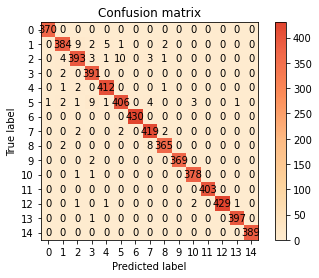

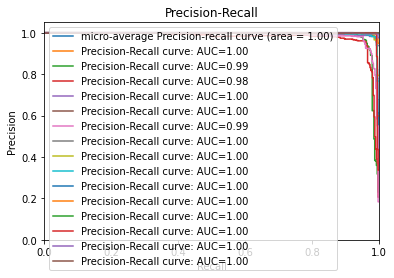

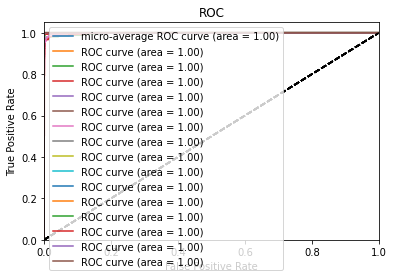

In [ ]:
getROC_AUC_Graph(clf5,"LogisticRegression",X_test,Y_test)


DecisionTreeClassifier
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
DecisionTreeClassifier Confusion Matrix
DecisionTreeClassifier precision recall 
DecisionTreeClassifier roc 


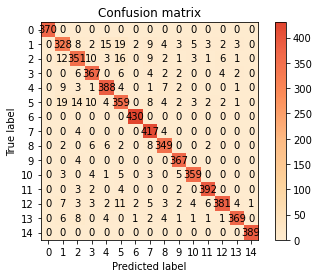

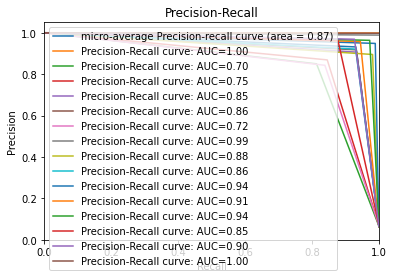

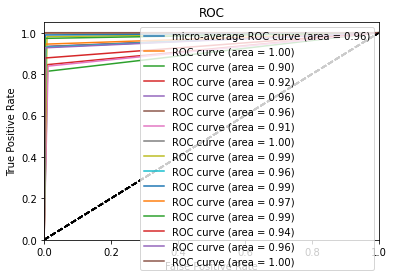

In [ ]:
getROC_AUC_Graph(clf6,"DecisionTreeClassifier",X_test,Y_test)


In [ ]:
models=loadAllTrainedModels()

loading all trained models


LogisticRegression (1)
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
LogisticRegression (1) Confusion Matrix
LogisticRegression (1) precision recall 
LogisticRegression (1) roc 
DecisionTreeClassifier
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
DecisionTreeClassifier Confusion Matrix
DecisionTreeClassifier precision recall 
DecisionTreeClassifier roc 


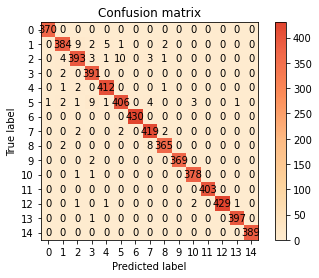

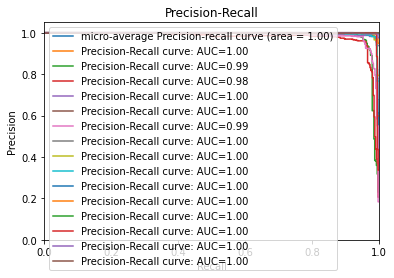

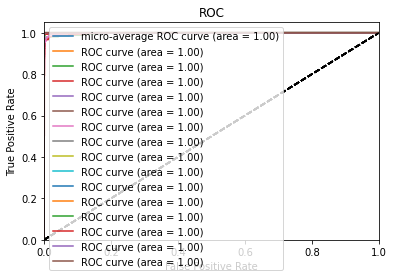

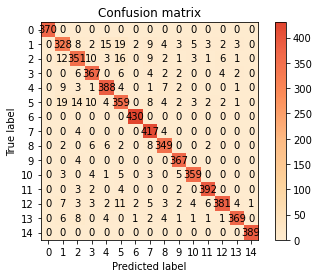

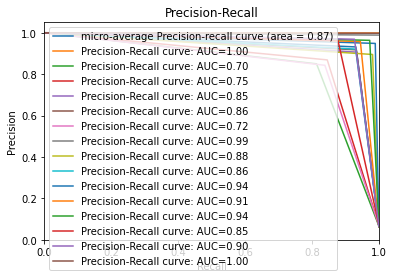

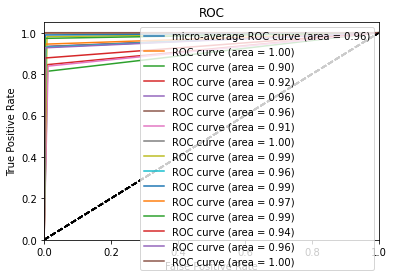

In [ ]:
for name,model in models:
  #getConfusionMatrix(model,name , X_test,Y_test)
  getROC_AUC_Graph(model,name,X_test,Y_test)

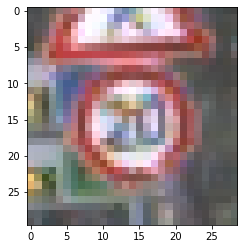

the answer from  Perceptron  model: [1]
the answer from  RandomForest  model: [12]
the answer from  xgboost  model: [2]


In [ ]:
#play ground here

inputimg = io.imread(ROOT + '/00000/' +'00000_00000.ppm' )
input = preProcessImage(inputimg)
plt.imshow(inputimg, interpolation='nearest')
plt.show()
for name,model in models:
   y=model.predict([input])
   print("the answer from " ,name , " model:",y)

In [ ]:
!pip install dask-ml
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV
clf5 = load("./RandomForest.joblib")
param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score,average='micro'),
    'recall_score': make_scorer(recall_score,average='micro'),
    'accuracy_score': make_scorer(accuracy_score)
}
skf = StratifiedKFold(n_splits=10)
grid_search = DaskGridSearchCV(clf5, param_grid, scoring=scorers, refit="precision_score",
                           cv=skf, return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, Y_train)

    # make the predictions
y_pred = grid_search.predict(X_test)

print('Best params for {}'.format("precision_score"))
print(grid_search.best_params_)

    # confusion matrix on the test data.
print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format("precision_score"))
print(pd.DataFrame(confusion_matrix(Y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


total input from TA : 3072  , 4
loading all trained models
xgboost(1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


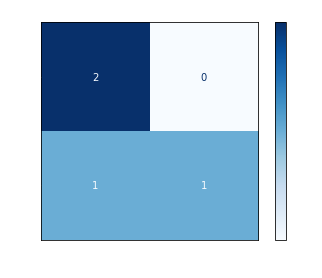

Perceptron (1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


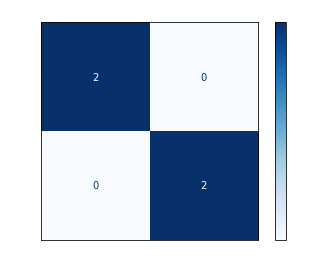

RandomForest


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


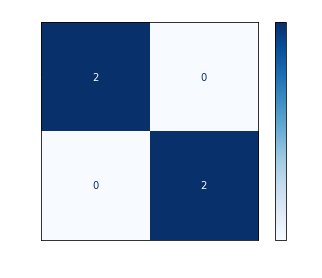

In [ ]:
# TA play ground 
# requirments 
#place all three models in the root , build a testData folder , put csv and test ppm inside this folder
inputs , answers = getTASet()
models =loadAllTrainedModels()
for name , model in models:
    getConfusionMatrix(model ,name , inputs , answers)
    getROC_AUC_Graph(model ,name , inputs , answers)